In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import joblib #para guardar el modelo

df1=pd.read_csv("Datos-completos-2016-2020-ordinario.csv",sep=',')

In [127]:
df1.head(20)

,Poblacion,IMCV,Ind Entorno de la vivienda,Ind Servicios publicos,Ind Medio ambiente,Ind Escolaridad,Ind Desescolarizacion,Ind Movilidad,Ind Capital fisico,Ind Participacion,...,Inclusion Social,Jovenes,Mujeres,Museo Casa la Memoria,Participacion,APP,DAP,Gestion Humana,INDER,Vivienda
0,130914,34.77,1.49,3.61,2.21,1.65,4.03,1.33,4.04,1.05,...,2.190000e+10,44300000.0,618000000.0,42100000.0,671000000.0,NaN,NaN,NaN,NaN,3.590000e+09
1,111992,36.89,2.03,3.85,2.15,1.71,4.08,1.39,4.31,1.04,...,1.320000e+10,47500000.0,428000000.0,49700000.0,605000000.0,NaN,NaN,NaN,NaN,1.730000e+09
2,160378,37.72,2.07,3.80,2.46,1.79,4.13,1.36,4.47,1.10,...,2.040000e+10,49300000.0,630000000.0,53200000.0,542000000.0,NaN,NaN,NaN,NaN,2.390000e+09
3,162596,43.73,3.47,3.92,2.39,2.00,4.16,1.51,5.74,1.17,...,1.730000e+10,73300000.0,510000000.0,46600000.0,615000000.0,NaN,NaN,NaN,NaN,8.670000e+08
4,150347,48.69,4.34,4.10,2.73,2.29,4.25,1.57,6.45,1.39,...,1.160000e+10,198000000.0,579000000.0,50200000.0,629000000.0,9.800000e+08,NaN,NaN,NaN,3.670000e+08
5,194239,41.43,2.60,4.04,2.67,1.93,4.18,1.49,5.14,1.27,...,1.360000e+10,59000000.0,707000000.0,44600000.0,805000000.0,2.520000e+08,NaN,NaN,NaN,1.070000e+09
6,173075,45.64,3.51,4.03,2.89,2.39,4.20,1.47,5.96,1.32,...,1.960000e+10,59400000.0,643000000.0,93200000.0,845000000.0,NaN,NaN,NaN,NaN,1.480000e+09
7,138045,38.76,2.34,3.71,2.50,1.97,4.11,1.39,4.72,1.16,...,1.800000e+10,168000000.0,664000000.0,58300000.0,708000000.0,2.520000e+08,NaN,NaN,NaN,2.130000e+09
8,137049,49.39,4.40,4.11,2.92,2.50,4.23,1.57,6.65,1.33,...,1.150000e+10,39800000.0,389000000.0,95300000.0,528000000.0,2.520000e+08,NaN,NaN,NaN,2.640000e+09
9,85587,55.91,6.60,4.00,2.43,2.97,4.33,1.59,7.60,1.38,...,3.080000e+10,25400000.0,205000000.0,91700000.0,447000000.0,3.110000e+09,NaN,NaN,NaN,1.340000e+08


In [131]:
#reemplazamos los nan por 0
df1 = df1.fillna(0)


In [132]:
cols= df1.columns

for col in cols:
    #convertimos las columans a numeros.  A veces vienen como strings 
    df1[col] = df1[col].astype(float)
    

#ahora dividimos las columnas de inversion por la poblacion
df1.iloc[:,17:]  = df1.iloc[:,17:].div(df1.Poblacion, axis=0) 

In [133]:
df1.head()

,Poblacion,IMCV,Ind Entorno de la vivienda,Ind Servicios publicos,Ind Medio ambiente,Ind Escolaridad,Ind Desescolarizacion,Ind Movilidad,Ind Capital fisico,Ind Participacion,...,Inclusion Social,Jovenes,Mujeres,Museo Casa la Memoria,Participacion,APP,DAP,Gestion Humana,INDER,Vivienda
0,130914.0,34.77,1.49,3.61,2.21,1.65,4.03,1.33,4.04,1.05,...,1.277827,0.002585,0.036059,0.002456,0.039152,0.000000,0.0,0.0,0.0,0.209470
1,111992.0,36.89,2.03,3.85,2.15,1.71,4.08,1.39,4.31,1.04,...,1.052446,0.003787,0.034125,0.003963,0.048237,0.000000,0.0,0.0,0.0,0.137934
2,160378.0,37.72,2.07,3.80,2.46,1.79,4.13,1.36,4.47,1.10,...,0.793123,0.001917,0.024494,0.002068,0.021072,0.000000,0.0,0.0,0.0,0.092920
3,162596.0,43.73,3.47,3.92,2.39,2.00,4.16,1.51,5.74,1.17,...,0.654375,0.002773,0.019291,0.001763,0.023262,0.000000,0.0,0.0,0.0,0.032794
4,150347.0,48.69,4.34,4.10,2.73,2.29,4.25,1.57,6.45,1.39,...,0.513179,0.008759,0.025615,0.002221,0.027827,0.043355,0.0,0.0,0.0,0.016236


In [174]:
cols    = ["Poblacion","IMCV","Ind Escolaridad","Ind Entorno de la vivienda","Ind Servicios publicos",
           "Ind Medio ambiente","Ind Desescolarizacion","Ind Movilidad","Ind Capital fisico",
           "Ind Participacion","Ind Libertad y seguridad","Ind Vulnerabilidad","Ind Salud",
           "Ind Trabajo","Ind Recreacion","Ind Percepcion calidad de vida","Ind Ingreso per-capita"]

indices = ["Ind Escolaridad","Ind Entorno de la vivienda","Ind Servicios publicos",
           "Ind Medio ambiente","Ind Desescolarizacion","Ind Movilidad","Ind Capital fisico",
           "Ind Participacion","Ind Libertad y seguridad","Ind Vulnerabilidad","Ind Salud",
           "Ind Trabajo","Ind Recreacion","Ind Percepcion calidad de vida","Ind Ingreso per-capita"]

df_dict = {} #en este diccionario guardaremos los dataframes de todos los indices


for i in range(len(indices)):
    new_cols = list(set(cols)-set([indices[i]])) #new_cols contiene todos los indices menos uno
    df_dict[indices[i]] = df1.drop(columns=new_cols)
    

In [177]:
nombres_modelos= ["escolaridad","vivienda","servicios","ambiente",
           "desescolarizacion","movilidad","capital_fisico","participacion","seguridad",
           "vulnerabilidad","salud","trabajo","recreacion","calidad_de_vida",
           "ingreso"]

n=0 # numero del modelo.  0 = escolaridad, 1 = vivienda, 2 = servicios, etc.

y_col= indices[n] #y_col es el nombre del indice que vamos a estudiar



# creamos las carpetas para guardar los modelos entrenados
import os
if not os.path.exists('./modelos_3_niveles'):
    os.makedirs('./modelos_3_niveles')
    
if not os.path.exists('./modelos_3_dependencias_3_niveles'):
    os.makedirs('./modelos_3_dependencias_3_niveles')

if not os.path.exists('./modelos_3_niveles'):
    os.makedirs('./modelos_3_niveles')


archivo_modelo='./modelos_3_niveles/'+nombres_modelos[n]+'.joblib'
archivo_modelo_3_attrib='./modelos_3_dependencias_3_niveles/'+nombres_modelos[n]+'.joblib'
archivo_3_dependencias = './principales_dependencias_3_niveles/'+nombres_modelos[n]+'.csv'


df= df_dict[y_col] #seleccionamos un dataframe particular para estudiar y crear el modelo


In [176]:
df.head()

,Ind Escolaridad,Cultura Ciudadana,Infraestructura,Medio Ambiente,Movilidad,Salud,Seguridad,Biblioteca,Desarrollo Economico,Educacion,...,Inclusion Social,Jovenes,Mujeres,Museo Casa la Memoria,Participacion,APP,DAP,Gestion Humana,INDER,Vivienda
0,1.65,0.101526,0.102109,0.004405,0.014704,3.740123,0.049479,0.000000,0.053155,3.967681,...,1.277827,0.002585,0.036059,0.002456,0.039152,0.000000,0.0,0.0,0.0,0.209470
1,1.71,0.092488,0.137137,0.000000,0.018179,3.930727,0.064981,0.000000,0.033009,4.281543,...,1.052446,0.003787,0.034125,0.003963,0.048237,0.000000,0.0,0.0,0.0,0.137934
2,1.79,0.052486,0.071537,0.001306,0.015979,2.488229,0.029587,0.000999,0.034252,2.628192,...,0.793123,0.001917,0.024494,0.002068,0.021072,0.000000,0.0,0.0,0.0,0.092920
3,2.00,0.245863,1.183926,0.000000,0.010478,1.758868,0.041608,0.000000,0.043121,2.401895,...,0.654375,0.002773,0.019291,0.001763,0.023262,0.000000,0.0,0.0,0.0,0.032794
4,2.29,0.035613,1.433361,0.000000,0.014599,1.221011,0.034020,0.000337,0.044151,2.552621,...,0.513179,0.008759,0.025615,0.002221,0.027827,0.043355,0.0,0.0,0.0,0.016236


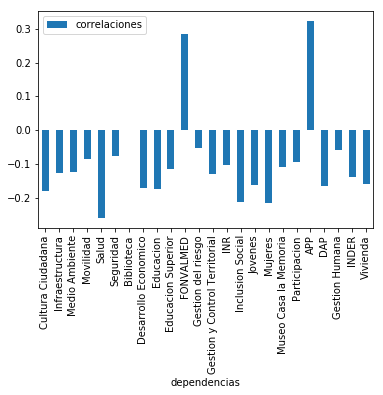

In [154]:
corrMatrix = df.corr() #matriz de correlaciones
cols=df.columns #nombres de las columnas
variables=cols[1:] #nombres de las variables independientes de df

c=corrMatrix[y_col].values #correlaciones solo con el indice escogido
c2 = c[1:] #correlaciones con la autocorrelacion excluida
c3 = c2.tolist()

df_bar = pd.DataFrame({'dependencias':variables, 'correlaciones':c3})
ax = df_bar.plot(x='dependencias', y='correlaciones',kind='bar')


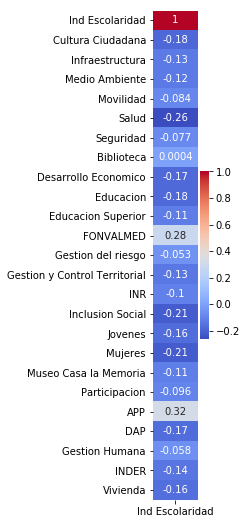

In [155]:
x = corrMatrix[[y_col]]
plt.figure(figsize=(1,9))
sn.heatmap(x, annot=True,cmap='coolwarm')
plt.show()

In [156]:
yy=df[y_col]
m=yy.mean()
s=yy.std()


def f(row,m,s):
    if row[y_col] < m-s/4:
        val = 1
    elif row[y_col] >= m-s/4 and row[y_col] <= m+s/4:
        val = 2
    else:
        val = 3
    return val


df[y_col] = df.apply(f,args=(m,s), axis=1)

df.head(20)





,Ind Escolaridad,Cultura Ciudadana,Infraestructura,Medio Ambiente,Movilidad,Salud,Seguridad,Biblioteca,Desarrollo Economico,Educacion,...,Inclusion Social,Jovenes,Mujeres,Museo Casa la Memoria,Participacion,APP,DAP,Gestion Humana,INDER,Vivienda
0,1,0.101526,0.102109,0.004405,0.014704,3.740123,0.049479,0.000000,0.053155,3.967681,...,1.277827,0.002585,0.036059,0.002456,0.039152,0.000000,0.0,0.0,0.0,0.209470
1,1,0.092488,0.137137,0.000000,0.018179,3.930727,0.064981,0.000000,0.033009,4.281543,...,1.052446,0.003787,0.034125,0.003963,0.048237,0.000000,0.0,0.0,0.0,0.137934
2,1,0.052486,0.071537,0.001306,0.015979,2.488229,0.029587,0.000999,0.034252,2.628192,...,0.793123,0.001917,0.024494,0.002068,0.021072,0.000000,0.0,0.0,0.0,0.092920
3,1,0.245863,1.183926,0.000000,0.010478,1.758868,0.041608,0.000000,0.043121,2.401895,...,0.654375,0.002773,0.019291,0.001763,0.023262,0.000000,0.0,0.0,0.0,0.032794
4,2,0.035613,1.433361,0.000000,0.014599,1.221011,0.034020,0.000337,0.044151,2.552621,...,0.513179,0.008759,0.025615,0.002221,0.027827,0.043355,0.0,0.0,0.0,0.016236
5,1,0.081900,0.048239,0.006785,0.011795,1.603550,0.021893,0.000000,0.019746,1.730774,...,0.360467,0.001564,0.018739,0.001182,0.021336,0.006679,0.0,0.0,0.0,0.028360
6,2,0.161910,0.219329,0.014255,0.013287,1.388752,0.036054,0.000000,0.044066,2.390256,...,0.654316,0.001983,0.021466,0.003111,0.028209,0.000000,0.0,0.0,0.0,0.049408
7,1,0.156902,0.550995,0.047281,0.015795,3.048841,0.029596,0.000000,0.037678,3.589341,...,0.944563,0.008816,0.034844,0.003059,0.037153,0.013224,0.0,0.0,0.0,0.111773
8,2,0.087316,0.543061,0.013630,0.042966,1.661127,0.040836,0.000000,0.038067,2.720628,...,0.612274,0.002119,0.020711,0.005074,0.028111,0.013417,0.0,0.0,0.0,0.140557
9,3,0.817732,3.208132,0.000000,0.096107,1.747408,0.795890,0.000000,0.289414,5.242225,...,4.204701,0.003468,0.027986,0.012519,0.061023,0.424566,0.0,0.0,0.0,0.018293


In [157]:
x_data = df.drop(columns=[y_col]).values
y_data = df[y_col]

n_comunas = 21
n_years_train = 4
n_years_test = 1

x_train = x_data[:n_comunas*n_years_train,:] 
x_test  = x_data[n_comunas*n_years_train:,:]

y_train = y_data[:n_comunas*n_years_train]
y_test  = y_data[n_comunas*n_years_train:]

features=df.drop(columns=[y_col]).columns


In [158]:
print("x_train shape = ",x_train.shape)
print("x_test shape  = ",x_test.shape)

('x_train shape = ', (84, 24))
('x_test shape  = ', (21, 24))


In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [160]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1700)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [161]:
x  = x_data[n_comunas*n_years_train:n_comunas*n_years_train+1,:]
x_new = x



y  = y_data[n_comunas*n_years_train:n_comunas*n_years_train+1]

y_hat = clf.predict(x_new)
print(y_hat)
print(y)


[1]
84    1
Name: Ind Escolaridad, dtype: int64


In [162]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.9047619047619048

In [163]:
confusion_matrix(y_test, y_pred)

array([[11,  1,  1],
       [ 0,  3,  0],
       [ 0,  0,  5]])

In [164]:
# salvar el modelo
joblib.dump(clf, archivo_modelo)

# cargar el modelo
loaded_clf = joblib.load(archivo_modelo)

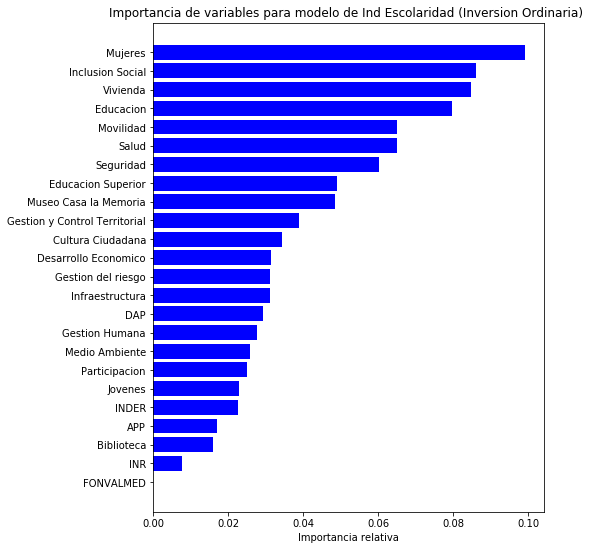

In [165]:
import numpy as np
importances = loaded_clf.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(7,9))
plt.title('Importancia de variables para modelo de %s (Inversion Ordinaria) '%y_col)

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

In [166]:
values = [] # para guardar el valor de importancia de los atributos
feat = []   # para guardar nombres de atributos

N=3 #primeros 10 atributos seran seleccionados

for i in range(N):
    values.append(importances[indices[n-1-i]])
    feat.append (features[indices[n-1-i]]) 

    
for i in range(N):    
    print(feat[i], values[i]) 

('Mujeres', 0.09918162184231764)
('Inclusion Social', 0.08623407464719528)
('Vivienda', 0.08475204584301219)


In [167]:
tmp = [y_col]
cols = tmp + feat # columnas para nuevo dataframe:  la del indice y las de los N atributos mas importantes
df2=df[cols]      

x_train2 = df2.iloc[:,1:].values

x_train2.shape

(105, 3)

In [168]:
scaler = StandardScaler().fit(x_train2)

x_train2 = scaler.transform(x_train2)
y_train2 = df[y_col]



clf=RandomForestClassifier(n_estimators=700)


clf.fit(x_train2,y_train2)


# save
joblib.dump(clf,archivo_modelo_3_attrib)

# load, no need to initialize the loaded_rf
loaded_clf2 = joblib.load(archivo_modelo_3_attrib)

In [169]:
dic = {'Indice':y_col,'dependencia0':feat[0],'dependencia1':feat[1],'dependencia2':feat[2]}
dic

{'Indice': 'Ind Escolaridad',
 'dependencia0': 'Mujeres',
 'dependencia1': 'Inclusion Social',
 'dependencia2': 'Vivienda'}

In [170]:
df3 = pd.DataFrame(dic,index=[0])
df3.to_csv(archivo_3_dependencias,index=False)

In [171]:
df4 = pd.read_csv(archivo_3_dependencias)
df4

,Indice,dependencia0,dependencia1,dependencia2
0,Ind Escolaridad,Mujeres,Inclusion Social,Vivienda
